In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/rahma/Documents/MiniProject/Investigate Hotel Business/hotel_bookings_data.csv")
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Preprocesing

1. Download file "Dataset"
2. Mengatasi data null (Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat.)
3. Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "meal")
4. Membuang data yang tidak diperlukan (Hint: Perhatikan total jumlah tamu untuk setiap pemesanan)

Table column descriptions (https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)
- hotel : The type of hotel (Resort Hotel and City Hotel)
- is_canceled : Indicated resevation canceled (1) or not (0)
- lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- arrival_date_year : year of arrival date (2017-2019)
- arrival_date_month : month of arrival date
- arrival_date_week_number : week number of year for arrival date
- arrival_date_day_month : day of arrival date
- stays_in_weekend_night : number of weekend (Saturday and Sunday) the guest stayed or booked to stay at hotel
- stays_in_weekdays_night : number of weekday the guest stayed or booked to stay at hotel
- adults : number of adults
- children : number of children
- babies : number of babies
- meal : type of meal booked, Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- city : guest city origin 
- market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- distribution channel : In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- is_repeated_guest : Indicated booking name was from a repeated guest (1) or not (0)
- previous_cancelation : Number of previous bookings that were cancelled by the customer prior to the current booking
- previous_booking_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking
- booking changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS
- deposit type : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- agent : ID of the travel agency that made the booking
- company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer
- customer_type : Type of booking, assuming one of four categories: Personal, Contract, Family, Business
- adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- required_car-parking_spaces : Number of car parking spaces required by the customer
- total_of_special_request : Number of special requests made by the customer (e.g. twin bed or high floor)
- reservation_status : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

In [4]:
#check table

for col in data :
    print(col)
    print(data[col].unique())

hotel
['Resort Hotel' 'City Hotel']
is_canceled
[0 1]
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

## Data NULL Check

theres 4 columns with missing value :
1. children : missing values means no children, will replace missing with 0
2. city : will replace by "Unknown"
3. agent : missing values mean not booking by agent, will replace missing values with 0
4. company : missing values mean not booking by company, will replace missing values with 0

In [5]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [6]:
data['children'] = data['children'].fillna(0)
data['city'] = data['city'].fillna('Unknown')
data['agent'] = data['agent'].fillna(0)
data['company'] = data['company'].fillna(0)

In [7]:
# check data after fill missing value
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Replace value
on meal column theres meal type undefined, will replace by "No Meal" because only four Categories are presented in standard hospitality meal packages.

In [8]:
print('Before:', data['meal'].unique())

data['meal'] = data['meal'].replace('Undefined','No Meal')

print('After:', data['meal'].unique())


Before: ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']
After: ['Breakfast' 'Full Board' 'Dinner' 'No Meal']


## Fixed Type of Column
for children, agent, and company column change from float to int

In [9]:
data['children'] = data['children'].astype(int)
data['agent'] = data['agent'].astype(int)
data['company'] = data['company'].astype(int)

## Remove all unnecessary Data
remove data with zero guest and zero stay
- guest = adults + children + babies
- stay = stays_in_weekend + stays_in_weekday

In [10]:
print('Before :', data.shape[0],' column')

data['total_guest'] = data['adults'] + data['children'] + data['babies']
data['total_stays'] = data['stays_in_weekdays_nights'] + data['stays_in_weekend_nights']

data_pre = data[(data['total_guest']>0) & (data['total_stays']>0)].copy()

print('After  :', data_pre.shape[0],' column')
print('Remove  :', round((data.shape[0]-data_pre.shape[0])/data.shape[0]*100,2),'% Data')

Before : 119390  column
After  : 118565  column
Remove  : 0.69 % Data


In [11]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_weekdays_nights        118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  int64  
 11  babies                          118565 non-null  int64  
 12  meal            

## Monthly Hotel Booking Analysis Based on Hotel Type

In [12]:
data_monthly = data_pre.groupby(['hotel','arrival_date_month'],as_index=False).\
            agg({'is_canceled':'count','arrival_date_year':'nunique'})
data_monthly = data_monthly.rename(columns={'hotel':'hotel type','arrival_date_month':'Month',\
                                            'is_canceled':'Order','arrival_date_year':'unique_year'})

data_monthly['Average_order'] = round((data_monthly['Order']/data_monthly['unique_year'])).astype(int)

#change month name to month number
data_monthly['Month_number'] = data_monthly['Month'].apply(lambda x : datetime.strptime(x, '%B').month)

#change month to 3 character
data_monthly['Month'] = data_monthly['Month'].apply(lambda x : datetime.strptime(x, '%B').strftime('%b'))

#find monthly order percentage
data_monthly['pct']= data_monthly['hotel type'].apply(lambda x : data_monthly[data_monthly['hotel type']==x]['Average_order'].sum())
data_monthly['pct'] = round(data_monthly['Average_order']/data_monthly['pct']*100,1)

#arange data column
data_monthly = data_monthly[['hotel type','Month','Month_number','Order','unique_year','Average_order','pct']].\
              sort_values(by=['hotel type','Month_number']).reset_index(drop=True)
data_monthly

,hotel type,Month,Month_number,Order,unique_year,Average_order,pct
0,City Hotel,Jan,1,4309,2,2154,5.9
1,City Hotel,Feb,2,4097,2,2048,5.6
2,City Hotel,Mar,3,3712,2,1856,5.1
3,City Hotel,Apr,4,4917,2,2458,6.7
4,City Hotel,May,5,6411,2,3206,8.8
5,City Hotel,Jun,6,7458,2,3729,10.2
6,City Hotel,Jul,7,8184,2,4092,11.2
7,City Hotel,Aug,8,7874,2,3937,10.8
8,City Hotel,Sep,9,8054,3,2685,7.3
9,City Hotel,Oct,10,8952,3,2984,8.1


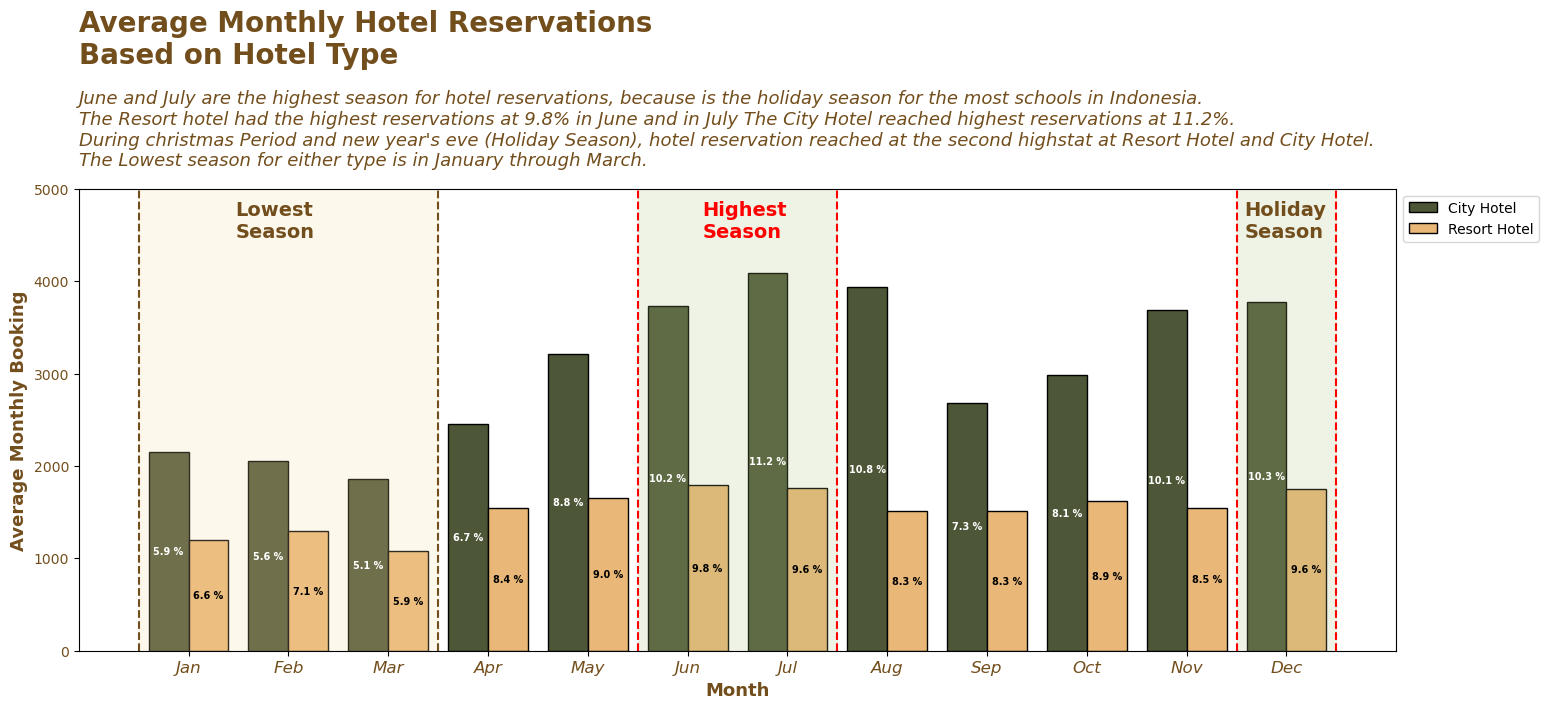

In [13]:
fig,ax = plt.subplots(1,1,figsize=(17,6))
# Create an array with the colors you want to use
colors = ["#4f5b31", "#fcba64"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.barplot(x='Month', y='Average_order', data=data_monthly, hue='hotel type', edgecolor='black')


plt.text(x=-1.1, y=5250,fontsize=13, fontstyle='italic',color='#734e1d',
         s="June and July are the highest season for hotel reservations, because is the holiday season for the most schools in Indonesia.\n"+\
            "The Resort hotel had the highest reservations at 9.8% in June and"+\
            " in July The City Hotel reached highest reservations at 11.2%.\n"+\
            "During christmas Period and new year's eve (Holiday Season), hotel reservation reached at the second highstat"+\
            " at Resort Hotel and City Hotel.\n"+\
            "The Lowest season for either type is in January through March.")

plt.bar_label(ax.containers[0], \
              list(map(lambda x: x + ' %', \
                data_monthly[data_monthly['hotel type'] =='City Hotel']['pct'].astype(str).tolist()))
              ,label_type='center', color='white', weight='bold', fontsize=7)

plt.bar_label(ax.containers[1], \
              list(map(lambda x: x + ' %', \
                data_monthly[data_monthly['hotel type'] =='Resort Hotel']['pct'].astype(str).tolist()))
              ,label_type='center', color='black', weight='bold', fontsize=7)

plt.legend(loc='upper left', bbox_to_anchor=[1, 1])

#highest season
plt.axvline(4.5, ls='--', color='red')
plt.axvline(6.5, ls='--', color='red')
plt.stackplot(np.arange(4.5,7.5), [[5000]], color='#acc37e', alpha=0.2)
plt.text(x=5.15, y=4650, s='Highest\nSeason', fontsize=14, color='red',fontweight='bold', va='center')

#holiday season
plt.axvline(10.5, ls='--', color='red')
plt.axvline(11.5, ls='--', color='red')
plt.stackplot(np.arange(10.5,12.5), [[5000]], color='#acc37e', alpha=0.2)
plt.text(x=10.58, y=4650, s='Holiday\nSeason', fontsize=14, color='#734e1d',fontweight='bold', va='center')

#Lowest season
plt.axvline(-0.5, ls='--', color='#734e1d')
plt.axvline(2.5, ls='--', color='#734e1d')
plt.stackplot(np.arange(-0.5,3.5), [[5000]], color='#f9dca1', alpha=0.2)
plt.text(x=0.47, y=4650, s='Lowest\nSeason', fontsize=14, color='#734e1d',fontweight='bold', va='center')


ax.set_ylabel('Average Monthly Booking',fontsize=13,fontweight='bold',color='#734e1d')
plt.yticks(fontsize=10,color='#734e1d')
ax.set_ylim(0,5000)

ax.set_xlabel('Month',fontsize=13,fontweight='bold',color='#734e1d')
plt.xticks(fontsize=12,fontstyle='italic',color='#734e1d')

ax.set_title('Average Monthly Hotel Reservations\nBased on Hotel Type', fontsize=20, fontweight='bold',pad=90, color='#734e1d', loc='left')
plt.savefig("Monthly Average.png", bbox_inches='tight',dpi=300, transparent=True)

plt.show()

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

- Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap) 👏
- Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya) (weeks : blur, karena tdk exact, or bikin aja pake night stay)
- Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
- Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
- Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan pemesanan hotel)

In [14]:
def group_s(x,c) :
    if(x<=7) :
        stat = 1
        kel = '1-7'
    elif (x<=14) :
        stat = 2
        kel = '8-14'
    elif (x<=21) :
        stat = 3
        kel = '15-21'
    else : 
        stat = 4
        kel = '>21'
        
    if (c=='num') :
        return stat
    else :
        return kel

In [15]:
data_cancel = data_pre.copy()
data_cancel['group_stay'] = data_cancel['total_stays'].apply(lambda x : group_s(x,'num'))
data_cancel['group_stay1'] = data_cancel['total_stays'].apply(lambda x : group_s(x,'n'))
data_cancel.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,total_stays,group_stay,group_stay1
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,Personal,75.0,0,0,Check-Out,1,1,1,1-7
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,Personal,75.0,0,0,Check-Out,1,1,1,1-7
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,Personal,98.0,0,1,Check-Out,2,2,1,1-7
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,Personal,98.0,0,1,Check-Out,2,2,1,1-7
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,Personal,107.0,0,0,Check-Out,2,2,1,1-7


In [16]:
data_rates  = data_cancel.groupby(['hotel','group_stay','is_canceled'],as_index=False).agg({'total_stays':'count','group_stay1':'unique'})
data_rates1 = data_rates.groupby(['hotel','group_stay'],as_index=False).agg({'total_stays':'sum'})
data_rates1 = data_rates1.rename(columns=({'total_stays':'sum_stays'}))
data_rates  = data_rates.merge(data_rates1,on=['hotel','group_stay'])
data_rates['group_stay1']  = data_rates['group_stay1'].apply(lambda x : x[0])
data_rates['pct'] = round(data_rates['total_stays']/data_rates['sum_stays']*100,2)
data_rates = data_rates[data_rates['is_canceled']==1]

data_rates

,hotel,group_stay,is_canceled,total_stays,group_stay1,sum_stays,pct
1,City Hotel,1,1,32391,1-7,77678,41.70
3,City Hotel,2,1,558,8-14,1069,52.20
5,City Hotel,3,1,76,15-21,105,72.38
7,City Hotel,4,1,41,>21,47,87.23
9,Resort Hotel,1,1,9907,1-7,35661,27.78
11,Resort Hotel,2,1,1078,8-14,3728,28.92
13,Resort Hotel,3,1,79,15-21,169,46.75
15,Resort Hotel,4,1,46,>21,108,42.59


In [17]:
data_rates['total_stays'].sum()

44176

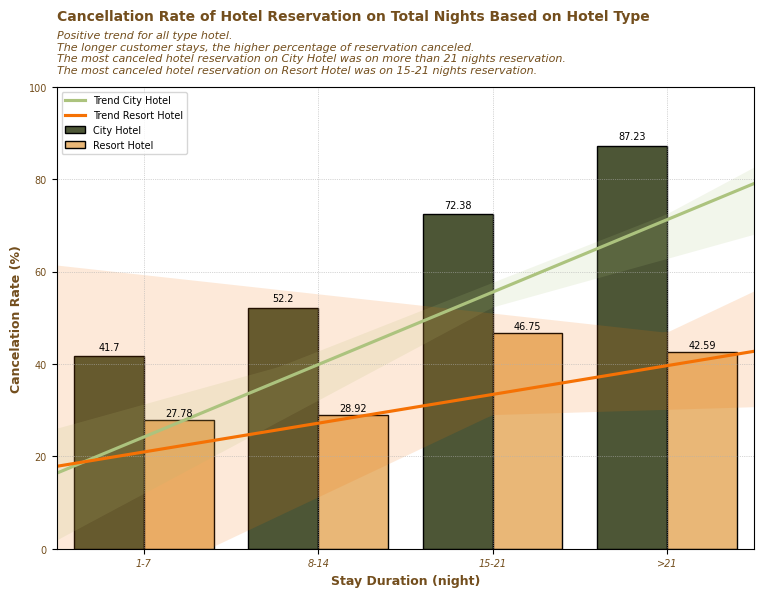

In [18]:
fig,ax = plt.subplots(1,1,figsize=(9,6))
# Create an array with the colors you want to use
colors = ["#4f5b31", "#fcba64"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.barplot(x='group_stay1', y='pct', data=data_rates, hue='hotel', edgecolor='black')

sns.regplot(x='group_stay', y='pct', data=data_rates[data_rates['hotel'] == 'City Hotel'],\
            scatter=False, label='Trend City Hotel', truncate=False,color='#acc37e')

sns.regplot(x='group_stay', y='pct', data=data_rates[data_rates['hotel'] == 'Resort Hotel'],\
            scatter=False, label='Trend Resort Hotel', truncate=False,color='#f57104')

plt.legend(loc='upper left',prop={'size':7})

ax.set_ylabel('Cancelation Rate (%)',fontsize=9,fontweight='bold',color='#734e1d')
plt.yticks(fontsize=7,color='#734e1d')
ax.set_ylim(0,100)

ax.set_xlabel('Stay Duration (night)',fontsize=9,fontweight='bold',color='#734e1d')
plt.xticks(fontsize=7,fontstyle='italic',color='#734e1d')

plt.bar_label(ax.containers[0], padding=3, fontsize=7)
plt.bar_label(ax.containers[1], padding=1.5, fontsize=7)

ax.set_title('Cancellation Rate of Hotel Reservation on Total Nights Based on Hotel Type', fontsize=10, fontweight='bold',pad=48, color='#734e1d', loc='left')
plt.text(x=-0.50, y=103,fontsize=8, fontstyle='italic',color='#734e1d',
         s="Positive trend for all type hotel.\n"+\
            "The longer customer stays, the higher percentage of reservation canceled.\n"+\
            "The most canceled hotel reservation on City Hotel was on more than 21 nights reservation.\n"+\
            "The most canceled hotel reservation on Resort Hotel was on 15-21 nights reservation.")


plt.grid(linestyle=':', linewidth=0.5)
plt.savefig("Cancellation Rate.png", bbox_inches='tight',dpi=300, transparent=True)
plt.show()

## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate
1. Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan (Hint: Perhatikan interval dalam membuat kategorisasi)
2. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
3. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
4. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh interval waktu)

<AxesSubplot:>

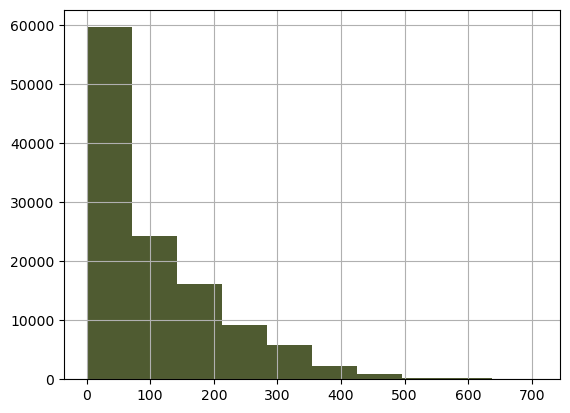

In [19]:
data_pre['lead_time'].hist()

In [93]:
def lead_class(x,y) :
    c = round(x/30)
    
    if (c<=11) :
        #stat = str(c)+'-'+str(c+1)+' month'
        stat = str(c+1)
    else :
        stat = '>12'
        
    if(y=='num') :
        if(c<=11) :
            kel = c
        else :
            kel =12
        return kel
    else :
        return stat

In [94]:
data_lead = data_pre.copy()
data_lead['group_lead'] = data_lead['lead_time'].apply(lambda x : lead_class(x,'y'))
data_lead['group_lead1'] = data_lead['lead_time'].apply(lambda x : lead_class(x,'num'))
data_lead.shape

(118565, 33)

In [95]:
data_leadc = data_lead.groupby(['hotel','is_canceled','group_lead1'],as_index=False).\
                                agg({'total_stays':'count','group_lead':'unique'})

data_lead1 = data_leadc.groupby(['hotel','group_lead1'],as_index=False).agg({'total_stays':'sum'})
data_lead1 = data_lead1.rename(columns=({'total_stays':'sum_stays'}))
data_leadc  = data_leadc.merge(data_lead1,on=['hotel','group_lead1'])
data_leadc['group_lead']  = data_leadc['group_lead'].apply(lambda x : x[0])
data_leadc['pct'] = round(data_leadc['total_stays']/data_leadc['sum_stays']*100,2)
data_leadc = data_leadc[data_leadc['is_canceled']==1]
data_leadc

,hotel,is_canceled,group_lead1,total_stays,group_lead,sum_stays,pct
1,City Hotel,1,0,2613,1,15628,16.72
3,City Hotel,1,1,4967,2,13573,36.59
5,City Hotel,1,2,4343,3,10674,40.69
7,City Hotel,1,3,3447,4,7830,44.02
9,City Hotel,1,4,2873,5,6422,44.74
11,City Hotel,1,5,2578,6,5251,49.10
13,City Hotel,1,6,2426,7,4664,52.02
15,City Hotel,1,7,1444,8,3000,48.13
17,City Hotel,1,8,1100,9,1851,59.43
19,City Hotel,1,9,1859,10,2736,67.95


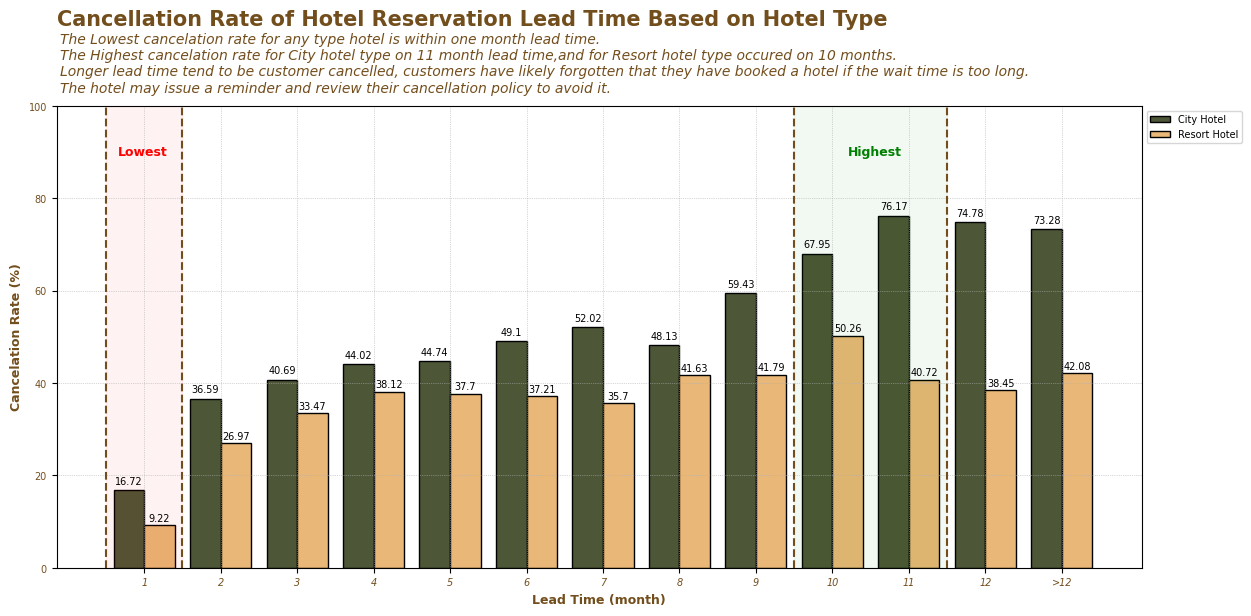

In [99]:
fig,ax = plt.subplots(1,1,figsize=(14,6))
# Create an array with the colors you want to use
colors = ["#4f5b31", "#fcba64"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.barplot(x='group_lead', y='pct', data=data_leadc, hue='hotel', edgecolor='black')

plt.legend(loc='upper left',prop={'size':7},bbox_to_anchor=[1, 1])

ax.set_ylabel('Cancelation Rate (%)',fontsize=9,fontweight='bold',color='#734e1d')
plt.yticks(fontsize=7,color='#734e1d')
ax.set_ylim(0,100)

ax.set_xlabel('Lead Time (month)',fontsize=9,fontweight='bold',color='#734e1d')
plt.xticks(fontsize=7,fontstyle='italic',color='#734e1d')

plt.bar_label(ax.containers[0], padding=3, fontsize=7)
plt.bar_label(ax.containers[1], padding=1.5, fontsize=7)

#Lowest season
plt.axvline(-0.5, ls='--', color='#734e1d')
plt.axvline(0.5, ls='--', color='#734e1d')
plt.stackplot(np.arange(-0.5,0.7), [[100]], color='r', alpha=0.05)
plt.text(x=-0.35, y=90, s='Lowest', fontsize=9, color='r',fontweight='bold', va='center')


#Highest season
plt.axvline(8.5, ls='--', color='#734e1d')
plt.axvline(10.5, ls='--', color='#734e1d')
plt.stackplot(np.arange(8.5,10.6), [[100]], color='g', alpha=0.05)
plt.text(x=9.2, y=90, s='Highest', fontsize=9, color='g',fontweight='bold', va='center')


ax.set_title('Cancellation Rate of Hotel Reservation Lead Time Based on Hotel Type', fontsize=15, fontweight='bold',pad=58, color='#734e1d', loc='left')
plt.text(x=-1.1, y=103,fontsize=10, fontstyle='italic',color='#734e1d',
         s="The Lowest cancelation rate for any type hotel is within one month lead time. \n"+\
            "The Highest cancelation rate for City hotel type on 11 month lead time,"+\
            "and for Resort hotel type occured on 10 months.\n"+\
            "Longer lead time tend to be customer cancelled, "+\
            "customers have likely forgotten that they have booked a hotel if the wait time is too long.\n"+\
             "The hotel may issue a reminder and review their cancellation policy to avoid it."
        )


plt.grid(linestyle=':', linewidth=0.5)
plt.savefig("Cancellation Rate Lead Time.png", bbox_inches='tight',dpi=300, transparent=True)
plt.show()